# Gym Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='once')

df= pd.read_csv('Downloads/gym_excercise.csv.csv')
print(df.columns)


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')


## Demographic Analysis


### 1. What is the number of male and female participants across different age groups? 

Age range  Female  Male
    15-25     101    90
    25-35      98   113
    35-45     109   132
    45-55     115   127
    55-65      39    49


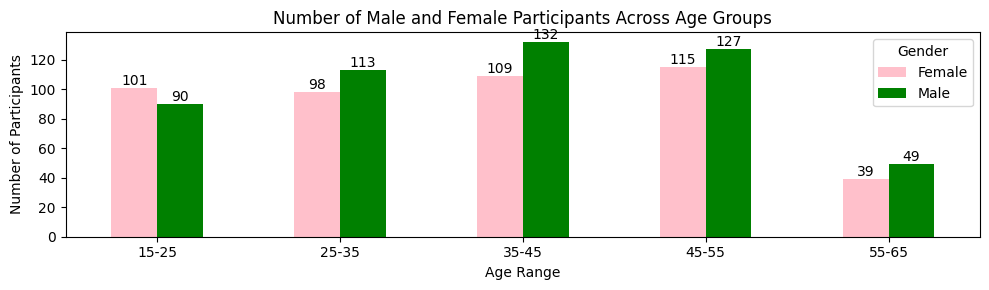

In [2]:
#Create bins for age groups
age_bins = pd.cut(df["Age"], bins=[15, 25, 35, 45, 55, 65],labels=["15-25", "25-35", "35-45", "45-55", "55-65"])

# Group by age bins and gender, then count the number of participants
age_gender_distribution = df.groupby([age_bins, "Gender"],observed=True).size().unstack()
# Reset the index for a clean DataFrame
age_gender_distribution_df = age_gender_distribution.reset_index(names='Age range')
print(age_gender_distribution_df.to_string(index=False))

ax = age_gender_distribution.plot(kind='bar', figsize=(10, 3), color=['pink', 'green'])

# Adding labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black') 
plt.title("Number of Male and Female Participants Across Age Groups")
plt.xlabel("Age Range")
plt.ylabel("Number of Participants")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

### 2. How are participants categorized by BMI (Underweight, Normal, Overweight, Obese) across different age groups and genders?"

In [3]:
# Create a column BMI_Category  named to categorize the members as Underweight, Normal weight, Overweight, or Obese based on their BMI.
def bmi_category(bmi):
    if bmi < 18:
        return 'Underweight'
    elif 18 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the BMI categorization
df['BMI_Category'] = df['BMI'].apply(bmi_category)

# Group by BMI category, age bins, and gender to get participant counts
bmi_age_gender_distribution = df.groupby(['BMI_Category',pd.cut(df['Age'], bins=[15, 25, 35, 45, 55, 65]), 'Gender'],observed=True).size().reset_index(name='Number of Participants')
# Display the resulting DataFrame
print(bmi_age_gender_distribution.head(5))

  BMI_Category       Age  Gender  Number of Participants
0       Normal  (15, 25]  Female                      48
1       Normal  (15, 25]    Male                      31
2       Normal  (25, 35]  Female                      55
3       Normal  (25, 35]    Male                      35
4       Normal  (35, 45]  Female                      61


## Health and Fitness Metrics

### 1. How does the average body fat percentage vary across different workout types?

Workout_Type  Average Fat Percentage
      Cardio                   25.40
        HIIT                   24.46
    Strength                   25.46
        Yoga                   24.48


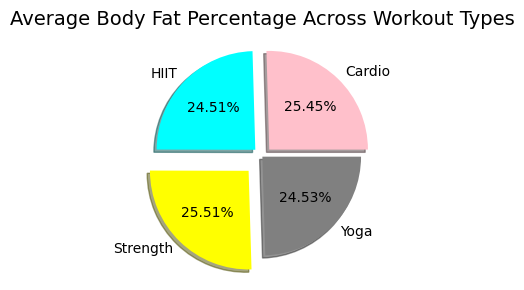

In [4]:
# group by Workout_Type and Fat_Percentage
new_df = df.groupby('Workout_Type')['Fat_Percentage'].mean().round(2).reset_index(name='Average Fat Percentage')
# Display the resulting DataFrame
print(new_df.to_string(index=False))
colors = ("pink", "cyan", "yellow", "grey")
explode = [0.1, 0.1, 0.2, 0]  # Slightly highlight the first two categories

# Plotting the pie chart
plt.figure(figsize=(4, 3))
plt.pie(new_df['Average Fat Percentage'],  labels=new_df['Workout_Type'], explode=explode, autopct='%1.2f%%', colors=colors, shadow=True )
plt.title('Average Body Fat Percentage Across Workout Types', fontsize=14)
plt.tight_layout()
plt.show()

### 2. How does the maximum heart rate (Max_BPM) varies across different experience levels (Beginner, Intermediate, Advanced)?

experience_level  Max_BPM
        Advanced   180.35
        Beginner   180.11
    Intermediate   179.46


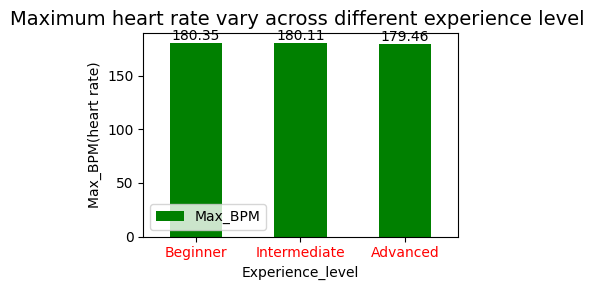

In [5]:
#create new column and label the differnt experience levels
df['experience_level']= df['Experience_Level'].apply(lambda e_level: 'Beginner' if e_level==1 else 'Intermediate' if e_level==2 else 'Advanced')
new_df= df.groupby('experience_level')['Max_BPM'].mean().reset_index().round(2)
print(new_df.to_string(index=False))
labels=['Beginner','Intermediate','Advanced']
ax = new_df.plot(kind='bar', figsize=(4, 3), color=['green'])

# Adding labels
for container in ax.containers:
    ax.bar_label(container, fmt='%1.2f', label_type='edge', fontsize=10, color='black')
plt.title('Maximum heart rate vary across different experience level ', fontsize=14)
plt.xlabel('Experience_level' ,fontsize=10)
plt.ylabel('Max_BPM(heart rate)',fontsize=10)
plt.xticks(ticks=range(len(labels)), labels=labels,color='red',rotation=0)
plt.tight_layout()
plt.show()


### 3. What is the average weight and height of gym members?

In [6]:
functions= ['mean', 'max']
result= df[['Weight (kg)','Height (m)']].agg(functions).round(2)
print(result)

      Weight (kg)  Height (m)
mean        73.85        1.72
max        129.90        2.00


## Performance and Workout Efficiency

### 1. Which workout type leads to the highest average calorie burn per hour?

Workout_Type  Calories_Burned
        HIIT           925.81
    Strength           910.70
        Yoga           903.19
      Cardio           884.51


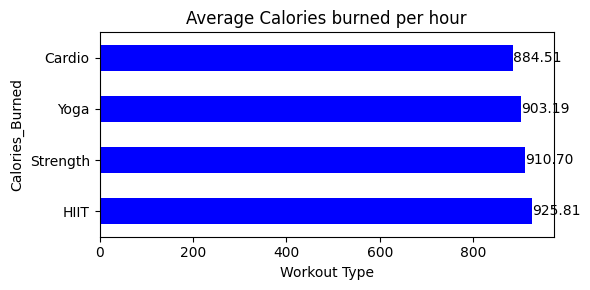

In [7]:
new_df=df.groupby('Workout_Type')['Calories_Burned'].mean().round(2).sort_values(ascending=False).reset_index()
print(new_df.to_string(index=False))
ax = new_df['Calories_Burned'].plot(kind='barh', figsize=(6, 3), color=['blue'])
# Adding labels
for container in ax.containers:
    ax.bar_label(container, fmt='%1.2f', label_type='edge', fontsize=10, color='black')
ax.set_yticks(new_df.index) 
ax.set_yticklabels(new_df['Workout_Type'], color='black')
plt.xlabel('Workout Type')
plt.ylabel('Calories_Burned')
plt.title('Average Calories burned per hour')
plt.tight_layout()
plt.show()      

### 2. How does water intake correlate with session duration and calories burned?

                          Water_Intake (liters)  Session_Duration (hours)  \
Water_Intake (liters)                  1.000000                  0.283411   
Session_Duration (hours)               0.283411                  1.000000   
Calories_Burned                        0.356931                  0.908140   

                          Calories_Burned  
Water_Intake (liters)            0.356931  
Session_Duration (hours)         0.908140  
Calories_Burned                  1.000000  


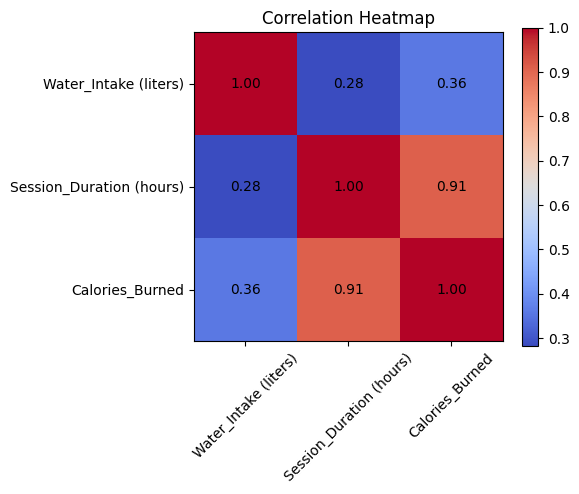

In [8]:
#calculate the correlation matrix
result = df[['Water_Intake (liters)', 'Session_Duration (hours)', 'Calories_Burned']].corr()
print(result)
# Plotting the heatmap using Matplotlib
plt.figure(figsize=(6, 5))
plt.imshow(result, interpolation='nearest', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.colorbar()
# Adding labels
plt.xticks(range(len(result.columns)), result.columns, rotation=45)
plt.yticks(range(len(result.columns)), result.columns)
# Adding text inside the heatmap
for i in range(len(result.columns)):
    for j in range(len(result.columns)):
        plt.text(j, i, format(result.iloc[i, j], '.2f'), ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

### 3. Calculate the average body fat percentage and BMI accross the workout frequency.

 Workout_Frequency  Fat_Percentage   BMI
                 2           27.44 25.01
                 3           27.59 24.68
                 4           23.69 25.25
                 5           14.66 24.54


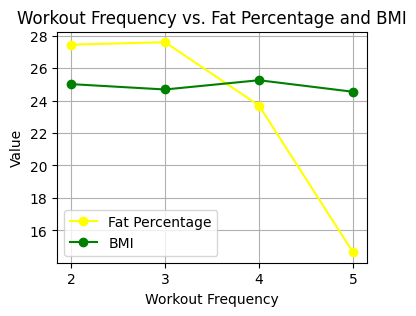

In [9]:
# Group by workout frequency and calculate the average body fat percentage and BMI
new_df= df.groupby('Workout_Frequency (days/week)')[['Fat_Percentage', 'BMI']].mean().round(2).reset_index(names='Workout_Frequency')
print(new_df.to_string(index=False))
#plot graph
plt.figure(figsize=(4, 3)) 
plt.plot(new_df['Workout_Frequency'], new_df['Fat_Percentage'], color='yellow', marker='o', label='Fat Percentage')
plt.plot(new_df['Workout_Frequency'], new_df['BMI'], color='green', marker='o', label='BMI') 
plt.xlabel('Workout Frequency') 
plt.ylabel('Value')
plt.title('Workout Frequency vs. Fat Percentage and BMI') 
plt.xticks(new_df['Workout_Frequency']) 
plt.legend() 
plt.grid(True) 
plt.show()


### 4. What is the distribution of workout types across different experience levels?"

In [10]:
df['experience_level']= df['Experience_Level'].apply(lambda e_level: 'Beginner' if e_level==1 else 'Intermediate' if e_level==2 else 'Adanced')
new_df= df.groupby('Experience_Level')['Workout_Type'].value_counts().sort_values(ascending=False).reset_index()

print(new_df.to_string(index=False))


 Experience_Level Workout_Type  count
                2     Strength    116
                1       Cardio    109
                2       Cardio    102
                2         Yoga    101
                1     Strength     97
                2         HIIT     87
                1         HIIT     85
                1         Yoga     85
                3         Yoga     53
                3         HIIT     49
                3     Strength     45
                3       Cardio     44


### 5. What is the average number of days worked out per week for each experience level?

 Experience_Level  Workout_Frequency (days/week)
                1                           2.48
                2                           3.53
                3                           4.53


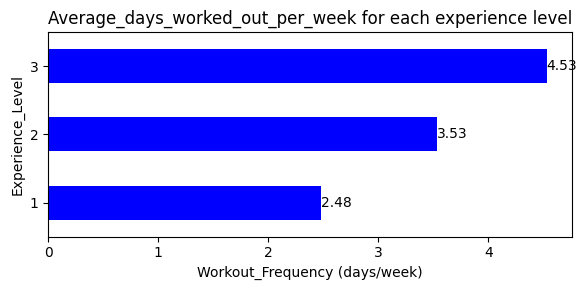

In [11]:
# group the values
new_df= df.groupby('Experience_Level')['Workout_Frequency (days/week)'].mean().round(2).reset_index()
print(new_df.to_string(index=False))

ax = new_df['Workout_Frequency (days/week)'].plot(kind='barh', figsize=(6, 3), color=['blue'])

# Adding labels
for container in ax.containers:
    ax.bar_label(container, fmt='%1.2f', label_type='edge', fontsize=10, color='black')
ax.set_yticks(new_df.index) 
ax.set_yticklabels(new_df['Experience_Level'], color='black')
plt.xlabel('Workout_Frequency (days/week)')
plt.ylabel('Experience_Level')
plt.title('Average_days_worked_out_per_week for each experience level')
plt.tight_layout()
plt.show()                      

### 6. How does consistency in workout frequency (4+ days per week) vary by gender?

In [12]:
# Create a new column to categorize participants as meeting or not meeting the recommended frequency (4+ days/week)
df['Meets_Recommended_Frequency'] = df['Workout_Frequency (days/week)'].apply(lambda x: 'Yes' if x >= 4 else 'No')
# Group by gender and calculate the percentage of participants meeting the recommended workout frequency
gender_consistency = df.groupby('Gender')['Meets_Recommended_Frequency'].value_counts(normalize=True).round(2).unstack(0) * 100
gender_consistency = gender_consistency.map(lambda x: f"{x:.2f}%")
# Reset the index for a clean DataFrame
gender_consistency_df = gender_consistency.reset_index()
# Display the resulting DataFrame
print(gender_consistency_df.to_string(index=False))

Meets_Recommended_Frequency Female   Male
                         No 57.00% 59.00%
                        Yes 43.00% 41.00%


### 7. Find the maximum, minimum,and average session duration.

Parameters  Session_Duration (hours)
       min                      0.50
       max                      2.00
      mean                      1.26


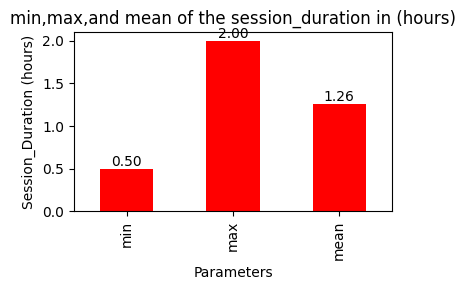

In [13]:
# To calculate min,max,mean
functions= ["min","max","mean"]
result= df['Session_Duration (hours)'].agg(functions).round(2).reset_index()
result=result.rename(columns= {'index':'Parameters'})
print(result.to_string(index=False))
#Adding labels
ax= result['Session_Duration (hours)'].plot(kind='bar', figsize=(4,3), color='red')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.2f', label_type='edge', fontsize=10, color='black')
ax.set_xticks(result.index) 
ax.set_xticklabels(functions, color='black')
plt.xlabel('Parameters')
plt.ylabel('Session_Duration (hours)')
plt.title('min,max,and mean of the session_duration in (hours)')
plt.tight_layout()
plt.show()                      
                   

## Hydration and Recovery

### 1. What is the average water intake per session across different workout types?

Workout_Type  Average_water_Intake (Liters)
      Cardio                           2.62
        HIIT                           2.65
    Strength                           2.60
        Yoga                           2.64


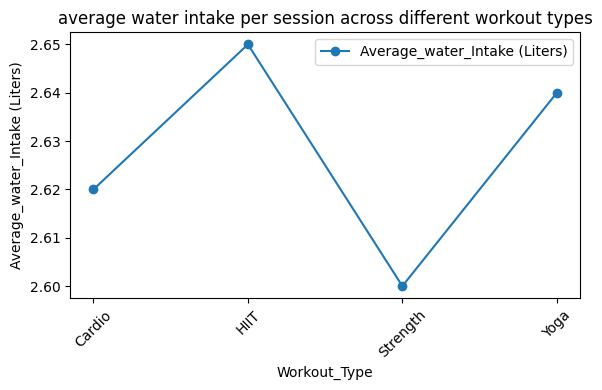

In [14]:
new_df= df.groupby('Workout_Type')['Water_Intake (liters)'].mean().round(2).reset_index()
new_df= new_df.rename(columns= {'Water_Intake (liters)' :'Average_water_Intake (Liters)'})
print(new_df.to_string(index=False))
labels=['Cardio','HIIT','Strength','Yoga']
new_df.plot(kind='line',figsize=(6,4) ,marker='o')
#Adding labels
plt.title("average water intake per session across different workout types")
plt.xlabel("Workout_Type")
plt.ylabel("Average_water_Intake (Liters)")
plt.xticks(ticks= range(len(labels)),labels=labels,rotation=45)
plt.tight_layout()
plt.show()

## Satistical Insights

### 1. Determine the mean and standard deviation of calories burned accross all sessions?

Mean Calories Burned: 905.42
Standard Deviation of Calories Burned: 272.64


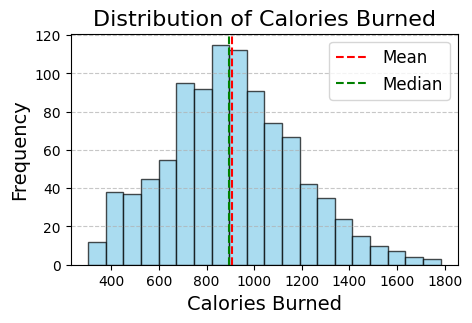

In [15]:
# Calculate mean and standard deviation for Calories_Burned
mean_calories = df["Calories_Burned"].mean().round(2)
std_dev_calories = df["Calories_Burned"].std().round(2)
print(f"Mean Calories Burned: {mean_calories}")
print(f"Standard Deviation of Calories Burned: {std_dev_calories}")
# Plot the histogram
plt.figure(figsize=(5, 3))
plt.hist(df["Calories_Burned"], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Calories Burned", fontsize=16)
plt.xlabel("Calories Burned", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.axvline(df["Calories_Burned"].mean(), color='red', linestyle='--', linewidth=1.5, label='Mean')
plt.axvline(df["Calories_Burned"].median(), color='green', linestyle='--', linewidth=1.5, label='Median')
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. Calculate the Inter Quartile Range(IQR) for calories_Burned

First Quartile (Q1): 720.0
Third Quartile (Q3): 1076.0
Interquartile Range (IQR): 356.0


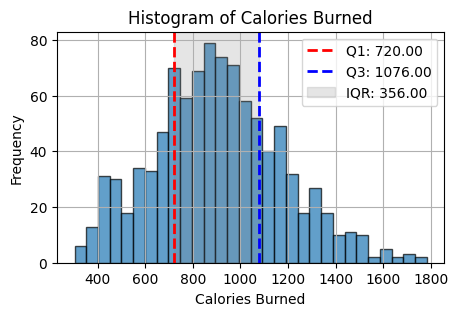

In [16]:
# Calculate IQR for Calories_Burned
Q1 = df["Calories_Burned"].quantile(0.25)
Q3 = df["Calories_Burned"].quantile(0.75)
IQR = Q3 - Q1
print(f"First Quartile (Q1): {Q1}")
print(f"Third Quartile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
# Plot the histogram
plt.figure(figsize=(5, 3))
plt.hist(df["Calories_Burned"], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.title('Histogram of Calories Burned')
# Add lines for Q1 and Q3
plt.axvline(Q1, color='r', linestyle='--', linewidth=2, label=f'Q1: {Q1:.2f}')
plt.axvline(Q3, color='b', linestyle='--', linewidth=2, label=f'Q3: {Q3:.2f}')
# Shade the IQR
plt.axvspan(Q1, Q3, alpha=0.2, color='gray', label=f'IQR: {IQR:.2f}')
plt.legend()
plt.grid(True)
plt.show()

### 3. Calculate and visualize the normal distribution curve for the calories burned during gym exercises.

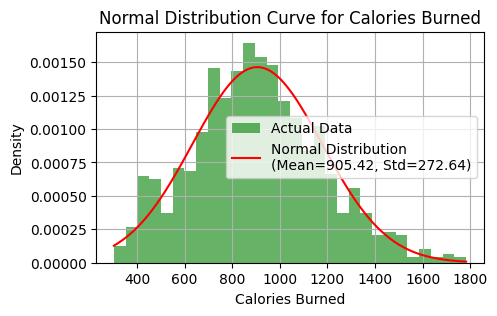

In [17]:
from scipy.stats import norm
# Calculating mean and standard deviation
mean_calories = df['Calories_Burned'].mean().round(2)
std_calories = df['Calories_Burned'].std().round(2)
# Creating range for x-axis (calories)
x = np.linspace(df['Calories_Burned'].min(), df['Calories_Burned'].max(), 500)
# Calculating y values for the normal distribution curve
y = norm.pdf(x, mean_calories, std_calories)
# Plotting the histogram and normal distribution curve
plt.figure(figsize=(5, 3))
plt.hist(df['Calories_Burned'], bins=30, density=True, alpha=0.6, color='g', label="Actual Data")
plt.plot(x, y, 'r-', label=f"Normal Distribution\n(Mean={mean_calories}, Std={std_calories})")
plt.title("Normal Distribution Curve for Calories Burned")
plt.xlabel("Calories Burned")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()